In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams['font.family'] = 'FreeSans'

# Cantilever subjected to end shear force

In [6]:
PSRI_control = False
nex = int(8)
ney = int(1)

ele_list = ["qua_P2", "qua_S2", "tri_P2B3", "tri_P2", "qua_P1", "tri_P1"]
marker_list = ["o", "h", "s", "d", "^", "v"]

P_S4R = np.array([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45,
                      0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0])
    
U_S4R = np.array([0.0, 0.026, 0.103, 0.224, 0.381, 0.563, 0.763, 0.971, 1.184, 1.396, 1.604,
                      1.807, 2.002, 2.190, 2.370, 2.541, 2.705, 2.861, 3.010, 3.151, 3.286])
    
W_S4R = np.array([0.0, 0.663, 1.309, 1.922, 2.493, 3.015, 3.488, 3.912, 4.292, 4.631, 4.933,
                      5.202, 5.444, 5.660, 5.855, 6.031, 6.190, 6.335, 6.467, 6.588, 6.698])

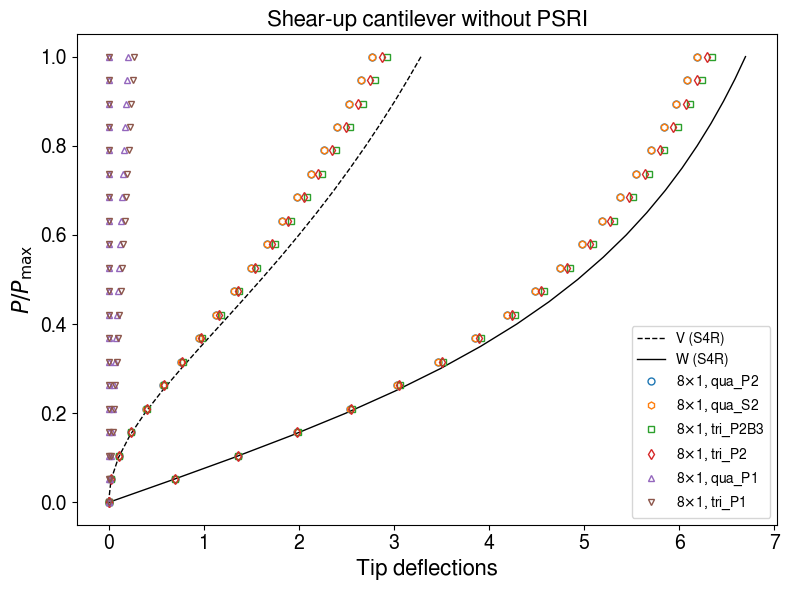

In [7]:
fig = plt.figure(figsize=(8.0, 6.0))
plt.plot(U_S4R, P_S4R, "--", color = "k", label="V (S4R)", linewidth = 1.0)
plt.plot(W_S4R, P_S4R, "-", color = "k", label="W (S4R)", linewidth = 1.0)

for index, ele_type in enumerate(ele_list):
    if not PSRI_control:
        results_folder = Path(f"results/nonlinear_Naghdi/non_PSRI/shear-up_cantilever/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/non_PSRI/shear-up_cantilever")
    else:
        results_folder = Path(f"results/nonlinear_Naghdi/shear-up_cantilever/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/shear-up_cantilever")
    
    Ps_list = np.loadtxt(results_folder / "Ps_Pmax.txt")
    u1_list = np.loadtxt(results_folder / "u1.txt")
    u3_list = np.loadtxt(results_folder / "u3.txt")
    u1_list[u1_list == 0.0] = np.nan
    u3_list[u3_list == 0.0] = np.nan
    u1_list[0] = 0.0
    u3_list[0] = 0.0
    plt.plot(-u1_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', label=f"{nex}$\\times${ney}, {ele_type}")
    
    plt.plot(u3_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none')
if PSRI_control:
    plt.title("Shear-up cantilever with PSRI", fontsize=16)
else:
    plt.title("Shear-up cantilever without PSRI", fontsize=16)
    
plt.ylabel(r"$P/P_{\mathrm{max}}$", fontsize=16)
plt.xlabel(r"Tip deflections", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.tight_layout()
plt.savefig(plot_folder/"comparisons.png", dpi=300)

# Cantilever subjected to end moment

In [10]:
PSRI_control = False
nex = int(8)
ney = int(1)

ele_list = ["qua_P2", "qua_S2", "tri_P2B3", "tri_P2", "qua_P1", "tri_P1"]
marker_list = ["o", "h", "s", "d", "^", "v"]

Ms_analytical = np.linspace(1E-3, 1.0, 100)
us = 12.0*(np.sin(2.0*np.pi*Ms_analytical)/(2.0*np.pi*Ms_analytical) - 1.0)
ws = -12.0*(1.0 - np.cos(2.0*np.pi*Ms_analytical))/(2.0*np.pi*Ms_analytical)

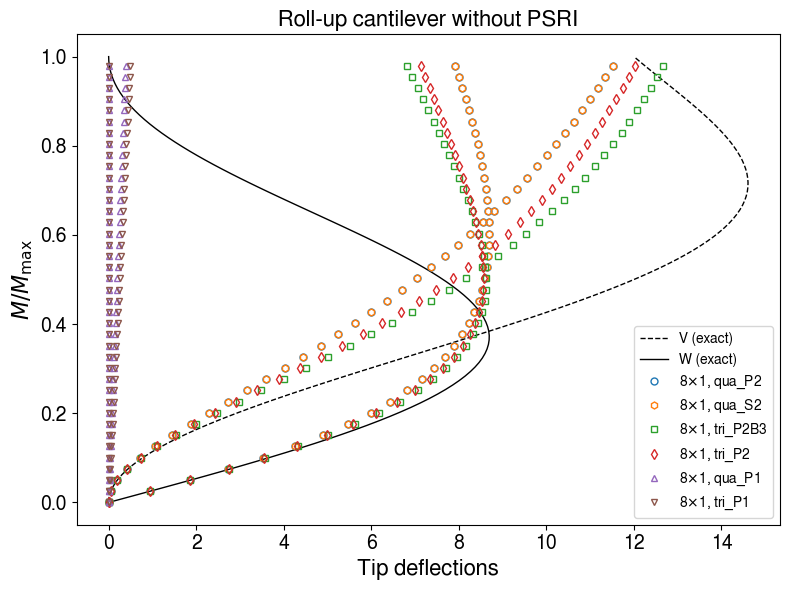

In [11]:
fig = plt.figure(figsize=(8.0, 6.0))
plt.plot(-us, Ms_analytical, "--", color = "k", label="V (exact)", linewidth = 1.0)
plt.plot(-ws, Ms_analytical, "-", color = "k", label="W (exact)", linewidth = 1.0)

for index, ele_type in enumerate(ele_list):
    if not PSRI_control:
        results_folder = Path(f"results/nonlinear_Naghdi/non_PSRI/roll-up_cantilever/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/non_PSRI/roll-up_cantilever")
    else:
        results_folder = Path(f"results/nonlinear_Naghdi/roll-up_cantilever/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/roll-up_cantilever")
    
    Ms_list = np.loadtxt(results_folder / "Ms_Mmax.txt")
    u1_list = np.loadtxt(results_folder / "u1.txt")
    u3_list = np.loadtxt(results_folder / "u3.txt")
    u1_list[u1_list == 0.0] = np.nan
    u3_list[u3_list == 0.0] = np.nan
    u1_list[0] = 0.0
    u3_list[0] = 0.0
    plt.plot(-u1_list, Ms_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 5, label=f"{nex}$\\times${ney}, {ele_type}")
    
    plt.plot(-u3_list, Ms_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 5)
if PSRI_control:
    plt.title("Roll-up cantilever with PSRI", fontsize=16)
else:
    plt.title("Roll-up cantilever without PSRI", fontsize=16)
    
plt.ylabel(r"$M/M_{\mathrm{max}}$", fontsize=16)
plt.xlabel(r"Tip deflections", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.tight_layout()
plt.savefig(plot_folder/"comparisons.png", dpi=300)

# Slit annular plate subjected to lifting line force

In [14]:
PSRI_control = True
nex = int(6)
ney = int(30)

ele_list = ["qua_P2", "qua_S2", "tri_P2B3"]
marker_list = ["o", "h", "s"]

P_S4R = np.array([0.00, 0.025, 0.050, 0.075, 0.100, 0.125, 0.150, 
                      0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50,
                      0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85,
                      0.90, 0.95, 1.00])
    
WA_S4R = np.array([0.00, 1.305, 2.455, 3.435, 4.277, 5.007, 5.649, 6.725, 7.602,
                       8.340, 8.974, 9.529, 10.023, 10.468, 10.876, 11.257, 11.620,
                       11.970, 12.310, 12.642, 12.966, 13.282, 13.590, 13.891])
    
WB_S4R = np.array([0.00, 1.789, 3.370, 4.720, 5.876, 6.872, 7.736, 9.160, 10.288,
                       11.213, 11.992, 12.661, 13.247, 13.768, 14.240, 14.674, 15.081,
                       15.469, 15.842, 16.202, 16.550, 16.886, 17.212, 17.528])

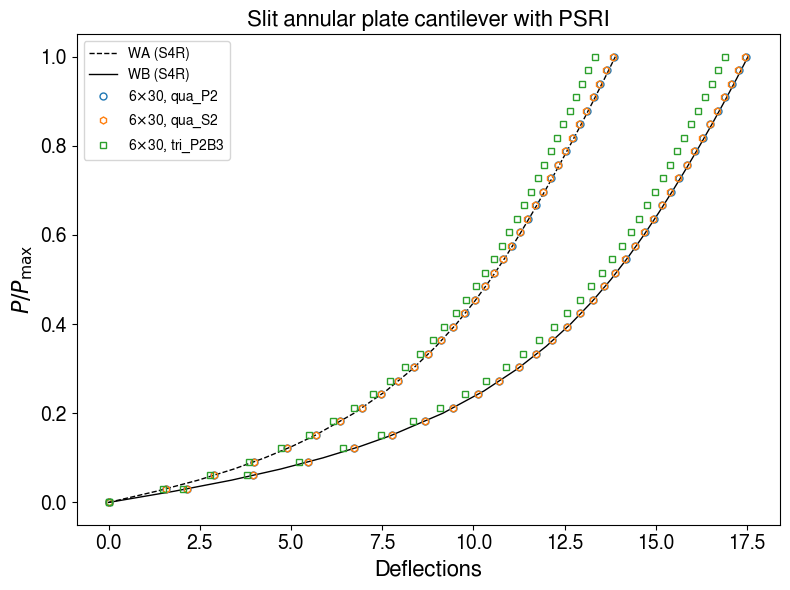

In [15]:
fig = plt.figure(figsize=(8.0, 6.0))
plt.plot(WA_S4R, P_S4R, "--", color = "k", label="WA (S4R)", linewidth = 1.0)
plt.plot(WB_S4R, P_S4R, "-", color = "k", label="WB (S4R)", linewidth = 1.0)

for index, ele_type in enumerate(ele_list):
    if not PSRI_control:
        results_folder = Path(f"results/nonlinear_Naghdi/non_PSRI/slit-annular-plate/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/non_PSRI/slit-annular-plate")
    else:
        results_folder = Path(f"results/nonlinear_Naghdi/slit-annular-plate/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/slit-annular-plate")
    
    Ps_list = np.loadtxt(results_folder / "Ps_Pmax.txt")
    WA_list = np.loadtxt(results_folder / "WA.txt")
    WB_list = np.loadtxt(results_folder / "WB.txt")
    WA_list[WA_list == 0.0] = np.nan
    WB_list[WB_list == 0.0] = np.nan
    WA_list[0] = 0.0
    WB_list[0] = 0.0
    plt.plot(WA_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 3, label=f"{nex}$\\times${ney}, {ele_type}")
    
    plt.plot(WB_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 3)
if PSRI_control:
    plt.title("Slit annular plate cantilever with PSRI", fontsize=16)
else:
    plt.title("Slit annular plate without PSRI", fontsize=16)
    
plt.ylabel(r"$P/P_{\mathrm{max}}$", fontsize=16)
plt.xlabel(r"Deflections", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.tight_layout()
plt.savefig(plot_folder/"comparisons.png", dpi=300)

# Hemispherical shell

In [16]:
PSRI_control = True
nex = int(12)
ney = int(12)

ele_list = ["qua_P2", "qua_S2", "tri_P2B3"]
marker_list = ["o", "h", "s"]

P_S4R = np.array([0.00, 0.050, 0.100, 0.150, 
                      0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50,
                      0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85,
                      0.90, 0.95, 1.00])
    
UA_S4R = np.array([0.00, 0.855, 1.499, 1.969, 2.321, 2.596, 2.819,
                       3.002, 3.158, 3.291, 3.406, 3.508, 3.598, 3.678, 3.750,
                       3.816, 3.875, 3.929, 3.979, 4.025, 4.067])
VB_S4R = np.array([0.00, 0.955, 1.840, 2.604, 3.261, 3.833, 4.339, 4.790,
                       5.196, 5.565, 5.902, 6.212, 6.497, 6.761, 7.006, 7.234,
                       7.448, 7.647, 7.835, 8.011, 8.178])

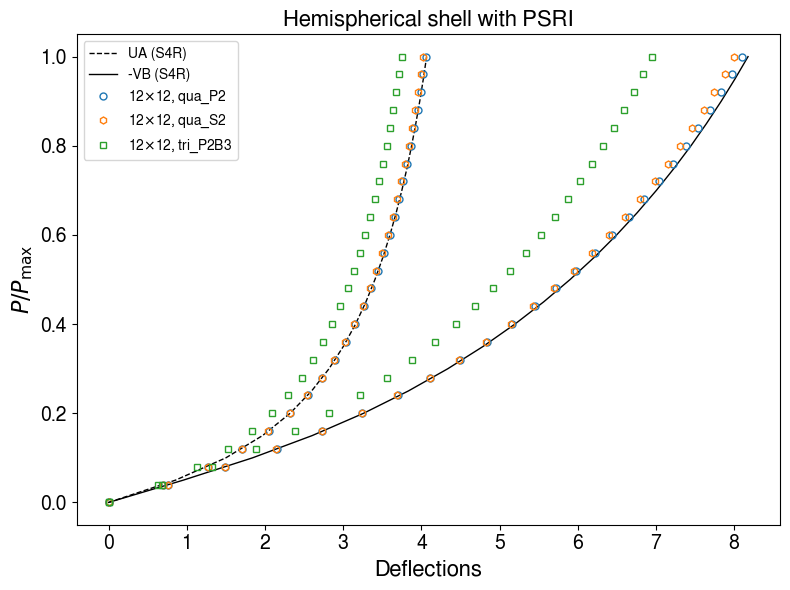

In [17]:
fig = plt.figure(figsize=(8.0, 6.0))
plt.plot(UA_S4R, P_S4R, "--", color = "k", label="UA (S4R)", linewidth = 1.0)
plt.plot(VB_S4R, P_S4R, "-", color = "k", label="-VB (S4R)", linewidth = 1.0)

for index, ele_type in enumerate(ele_list):
    if not PSRI_control:
        results_folder = Path(f"results/nonlinear_Naghdi/non_PSRI/radial-hemisphere/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/non_PSRI/radial-hemisphere")
    else:
        results_folder = Path(f"results/nonlinear_Naghdi/radial-hemisphere/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/radial-hemisphere")
    
    Ps_list = np.loadtxt(results_folder / "Ps_Pmax.txt")
    UA_list = np.loadtxt(results_folder / "UA.txt")
    VB_list = np.loadtxt(results_folder / "VB.txt")
    UA_list[UA_list == 0.0] = np.nan
    VB_list[VB_list == 0.0] = np.nan
    UA_list[0] = 0.0
    VB_list[0] = 0.0
    plt.plot(UA_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 2, label=f"{nex}$\\times${ney}, {ele_type}")
    
    plt.plot(-VB_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 2)
if PSRI_control:
    plt.title("Hemispherical shell with PSRI", fontsize=16)
else:
    plt.title("Hemispherical shell without PSRI", fontsize=16)
    
plt.ylabel(r"$P/P_{\mathrm{max}}$", fontsize=16)
plt.xlabel(r"Deflections", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.tight_layout()
plt.savefig(plot_folder/"comparisons.png", dpi=300)

# Pullout of cylinder

In [18]:
PSRI_control = True
nex = int(24)
ney = int(16)

ele_list = ["qua_P2", "qua_S2", "tri_P2B3"]
marker_list = ["o", "h", "s"]

P_S4R = np.array([0.00, 0.025, 0.050, 0.075, 0.100, 0.150, 
                      0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.525,
                      0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85,
                      0.90, 0.95, 1.00])
    
WA_S4R = np.array([0.00, 0.819, 1.260, 1.527, 1.707, 1.936, 2.079, 2.180,
                       2.257, 2.321, 2.376, 2.425, 2.473, 2.543, 2.577, 2.618,
                       2.648, 2.672, 2.692, 2.710, 2.726, 2.741, 2.755, 2.768])

UB_S4R = np.array([0.00, 0.864, 1.471, 1.901, 2.217, 2.641, 2.904, 3.087,
                       3.227, 3.342, 3.443, 3.539, 3.653, 4.061, 4.171, 4.274,
                       4.338, 4.385, 4.423, 4.455, 4.483, 4.508, 4.530, 4.551])

UC_S4R = np.array([0.00, 0.872, 1.493, 1.946, 2.293, 2.792, 3.106, 3.310,
                       3.452, 3.556, 3.632, 3.688, 3.718, 3.580, 3.518, 3.452,
                       3.410, 3.378, 3.353, 3.332, 3.313, 3.297, 3.283, 3.269])

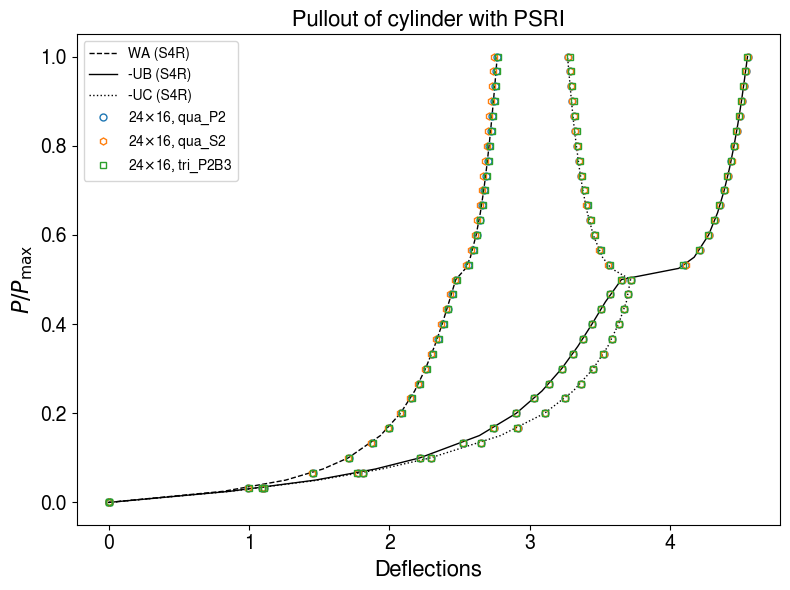

In [19]:
fig = plt.figure(figsize=(8.0, 6.0))
plt.plot(WA_S4R, P_S4R, "--", color = "k", label="WA (S4R)", linewidth = 1.0)
plt.plot(UB_S4R, P_S4R, "-", color = "k", label="-UB (S4R)", linewidth = 1.0)
plt.plot(UC_S4R, P_S4R, ":", color = "k", label="-UC (S4R)", linewidth = 1.0)
for index, ele_type in enumerate(ele_list):
    if not PSRI_control:
        results_folder = Path(f"results/nonlinear_Naghdi/non_PSRI/pullout-cylinder/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/non_PSRI/pullout-cylinder")
    else:
        results_folder = Path(f"results/nonlinear_Naghdi/pullout-cylinder/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/pullout-cylinder")
    
    Ps_list = np.loadtxt(results_folder / "PS_Pmax.txt")
    WA_list = np.loadtxt(results_folder / "WA.txt")
    UB_list = np.loadtxt(results_folder / "UB.txt")
    UC_list = np.loadtxt(results_folder / "UC.txt")
    WA_list[WA_list == 0.0] = np.nan
    UB_list[UB_list == 0.0] = np.nan
    UC_list[UC_list == 0.0] = np.nan
    WA_list[0] = 0.0
    UB_list[0] = 0.0
    UC_list[0] = 0.0
    plt.plot(WA_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 1, label=f"{nex}$\\times${ney}, {ele_type}")
    
    plt.plot(-UB_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 1)
    
    plt.plot(-UC_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 1)
    
if PSRI_control:
    plt.title("Pullout of cylinder with PSRI", fontsize=16)
else:
    plt.title("Pullout of cylinder without PSRI", fontsize=16)
    
plt.ylabel(r"$P/P_{\mathrm{max}}$", fontsize=16)
plt.xlabel(r"Deflections", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.tight_layout()
plt.savefig(plot_folder/"comparisons.png", dpi=300)

# Pinched cylinder

In [20]:
PSRI_control = True
nex = int(40)
ney = int(40)

ele_list = ["qua_P2", "qua_S2", "tri_P2B3"]
marker_list = ["o", "h", "s"]

P_S4R = np.array([0.00, 0.05, 0.075, 0.100, 0.125, 0.15, 0.175,
                      0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50,
                      0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85,
                      0.90, 0.95, 1.00])
    
WA_S4R = np.array([0.00, 9.561, 15.648, 23.164, 29.375, 36.208, 51.499, 56.373,
                       61.877, 65.498, 68.229, 70.424, 72.204, 73.790, 75.139, 76.331,
                       77.472, 78.451, 79.339, 80.218, 81.045, 81.766, 82.435, 83.102])
UB_S4R = np.array([0.00, -0.233, -0.922, -2.391, -3.872, -2.154, 6.792, 10.448,
                       14.905, 17.979, 20.365, 22.321, 23.916, 25.381, 26.631, 27.735,
                       28.843, 29.772, 30.604, 31.471, 32.299, 32.989, 33.619, 34.272])

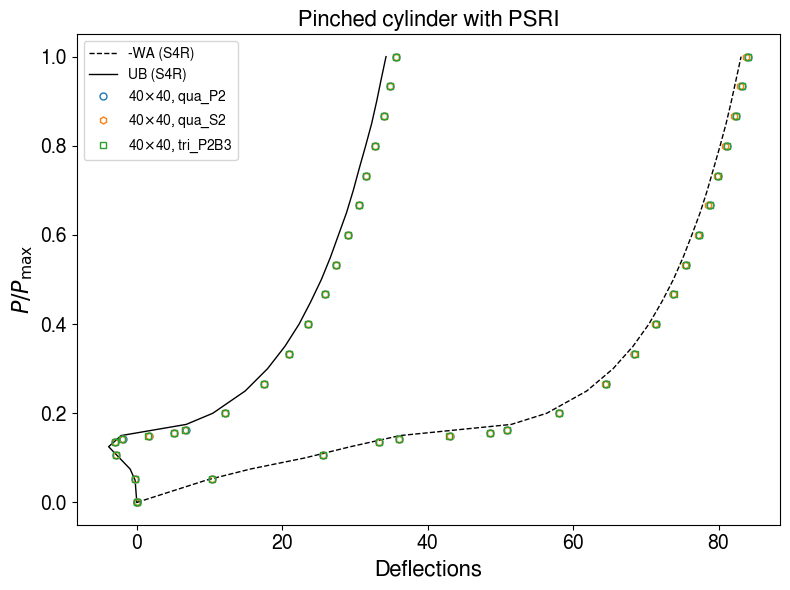

In [21]:
fig = plt.figure(figsize=(8.0, 6.0))
plt.plot(WA_S4R, P_S4R, "--", color = "k", label="-WA (S4R)", linewidth = 1.0)
plt.plot(UB_S4R, P_S4R, "-", color = "k", label="UB (S4R)", linewidth = 1.0)

for index, ele_type in enumerate(ele_list):
    if not PSRI_control:
        results_folder = Path(f"results/nonlinear_Naghdi/non_PSRI/pinched-cylinder/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/non_PSRI/pinched-cylinder")
    else:
        results_folder = Path(f"results/nonlinear_Naghdi/pinched-cylinder/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/pinched-cylinder")
    
    Ps_list = np.loadtxt(results_folder / "PS_Pmax.txt")
    WA_list = np.loadtxt(results_folder / "WA.txt")
    UB_list = np.loadtxt(results_folder / "UB.txt")
 
    WA_list[WA_list == 0.0] = np.nan
    UB_list[UB_list == 0.0] = np.nan

    WA_list[0] = 0.0
    UB_list[0] = 0.0

    plt.plot(-WA_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 4, label=f"{nex}$\\times${ney}, {ele_type}")
    
    plt.plot(UB_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 4)
    
    
if PSRI_control:
    plt.title("Pinched cylinder with PSRI", fontsize=16)
else:
    plt.title("Pinched cylinder without PSRI", fontsize=16)
    
plt.ylabel(r"$P/P_{\mathrm{max}}$", fontsize=16)
plt.xlabel(r"Deflections", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.tight_layout()
plt.savefig(plot_folder/"comparisons.png", dpi=300)

# Pinched semi-cylindrical shell

In [24]:
PSRI_control = True
nex = int(64)
ney = int(32)

ele_list = ["qua_P2", "qua_S2", "tri_P2B3"]
marker_list = ["o", "h", "s"]

WA_S4R = 1.e-2*np.array([0., 5.421, 16.1, 22.195, 27.657, 32.7, 37.582, 42.633,
        48.537, 56.355, 66.410, 79.810, 94.669, 113.704, 124.751, 132.653,
        138.920, 144.185, 148.770, 152.863, 156.584, 160.015, 163.211,
        166.200, 168.973, 171.505])
        
P_S4R = np.array([0., .05, .1, .125, .15, .175, .2, .225, .25, .275, .3,
        .325, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1.])

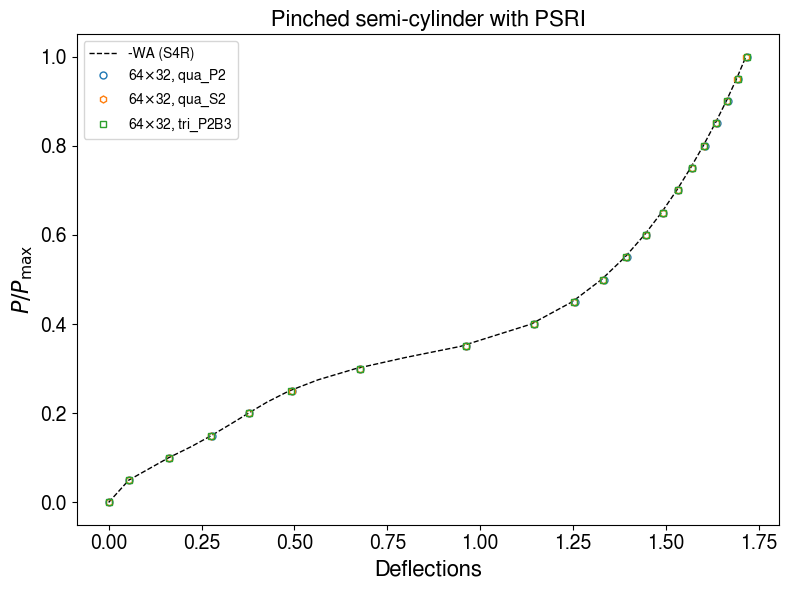

In [25]:
fig = plt.figure(figsize=(8.0, 6.0))
plt.plot(WA_S4R, P_S4R, "--", color = "k", label="-WA (S4R)", linewidth = 1.0)

for index, ele_type in enumerate(ele_list):
    if not PSRI_control:
        results_folder = Path(f"results/nonlinear_Naghdi/non_PSRI/semi_cylinder/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/non_PSRI/semi_cylinder")
    else:
        results_folder = Path(f"results/nonlinear_Naghdi/semi_cylinder/{nex}_{ney}_{ele_type}")
        plot_folder = Path("results/nonlinear_Naghdi/semi_cylinder")
    
    Ps_list = np.loadtxt(results_folder / "PS_Pmax.txt")
    WA_list = np.loadtxt(results_folder / "WA.txt")
 
    WA_list[WA_list == 0.0] = np.nan

    WA_list[0] = 0.0

    plt.plot(-WA_list, Ps_list, marker = marker_list[index], color = f"C{index}", markersize=5, linestyle='None',
             markerfacecolor='none', markevery = 2, label=f"{nex}$\\times${ney}, {ele_type}")
    
    
    
if PSRI_control:
    plt.title("Pinched semi-cylinder with PSRI", fontsize=16)
else:
    plt.title("Pinched semi-cylinder without PSRI", fontsize=16)
    
plt.ylabel(r"$P/P_{\mathrm{max}}$", fontsize=16)
plt.xlabel(r"Deflections", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.tight_layout()
plt.savefig(plot_folder/"comparisons.png", dpi=300)